### Sept. 29, 2020

It's another day at the office at Big Research Co ™. You look up from your laptop and see a woman in a lab coat standing in front of your desk.

"I need some help" she says. "We lost some subjects from the trial."

She notices a curious look on your face.

"Not like that, they just ran away. We didn't lock the doors soon enough."

"Anyway, there's probably like a 70%, no maybe 80%, no, let's say 90% chance that a given subject will stick around, and I need to run the study again with 10, or 20 subjects. We need to gather enough data on them to justify the cost, so I need you to figure out what are the probabilities are that at least half of them stick around, only 1 person leaves, and that all the subjects stay."

She sees you start to form another question and cuts you off.

"Don't ask. You really don't want to know."

- What probability distribution would you use to model the scenario outlined above?

Binomial Distribution because we are given a number of trials and a probability with only two outcomes possible, staying or leaving.

- Calculate all the requested probabilities. Use all the possible combinations of subject count and chance that a subject will stay in the study.

In [85]:
import itertools as it
from scipy import stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
row1 = pd.DataFrame([binom(10, .7).sf(4), binom(10, .7).cdf(1), binom(10, .7).pmf(10)]).T
row1

,0,1,2
0,0.952651,0.000144,0.028248


In [66]:
row2 = pd.DataFrame([binom(10, .8).sf(4), binom(10, .8).cdf(1), binom(10, .8).pmf(10)]).T

In [67]:
row3 = pd.DataFrame([binom(10, .9).sf(4), binom(10, .9).cdf(1), binom(10, .9).pmf(10)]).T

In [68]:
row4 = pd.DataFrame([binom(20, .7).sf(9), binom(20, .7).cdf(1), binom(20, .7).pmf(20)]).T

In [69]:
row5 = pd.DataFrame([binom(20, .8).sf(9), binom(20, .8).cdf(1), binom(20, .8).pmf(20)]).T

In [70]:
row6 = pd.DataFrame([binom(20, .9).sf(9), binom(20, .9).cdf(1), binom(20, .9).pmf(10)]).T

In [83]:
rows10 = [row1, row2, row3]
rows20 = [row4, row5, row6]

- Bonus: visualize the requested probabilities.

Hints

    - Use scipy.stats for this.
    - A fancy list comprehension or the itertools module can help you find all the possible combinations.
    - Consider storing the results of your calculations in a data frame.

# Solutions

In [86]:
ps = [.7, .8, .9]
ns = [10, 20]
ks = range(21)

In [87]:
list(it.product(ps, ns, ks))

[(0.7, 10, 0),
 (0.7, 10, 1),
 (0.7, 10, 2),
 (0.7, 10, 3),
 (0.7, 10, 4),
 (0.7, 10, 5),
 (0.7, 10, 6),
 (0.7, 10, 7),
 (0.7, 10, 8),
 (0.7, 10, 9),
 (0.7, 10, 10),
 (0.7, 10, 11),
 (0.7, 10, 12),
 (0.7, 10, 13),
 (0.7, 10, 14),
 (0.7, 10, 15),
 (0.7, 10, 16),
 (0.7, 10, 17),
 (0.7, 10, 18),
 (0.7, 10, 19),
 (0.7, 10, 20),
 (0.7, 20, 0),
 (0.7, 20, 1),
 (0.7, 20, 2),
 (0.7, 20, 3),
 (0.7, 20, 4),
 (0.7, 20, 5),
 (0.7, 20, 6),
 (0.7, 20, 7),
 (0.7, 20, 8),
 (0.7, 20, 9),
 (0.7, 20, 10),
 (0.7, 20, 11),
 (0.7, 20, 12),
 (0.7, 20, 13),
 (0.7, 20, 14),
 (0.7, 20, 15),
 (0.7, 20, 16),
 (0.7, 20, 17),
 (0.7, 20, 18),
 (0.7, 20, 19),
 (0.7, 20, 20),
 (0.8, 10, 0),
 (0.8, 10, 1),
 (0.8, 10, 2),
 (0.8, 10, 3),
 (0.8, 10, 4),
 (0.8, 10, 5),
 (0.8, 10, 6),
 (0.8, 10, 7),
 (0.8, 10, 8),
 (0.8, 10, 9),
 (0.8, 10, 10),
 (0.8, 10, 11),
 (0.8, 10, 12),
 (0.8, 10, 13),
 (0.8, 10, 14),
 (0.8, 10, 15),
 (0.8, 10, 16),
 (0.8, 10, 17),
 (0.8, 10, 18),
 (0.8, 10, 19),
 (0.8, 10, 20),
 (0.8, 20, 0),
 (0.8, 

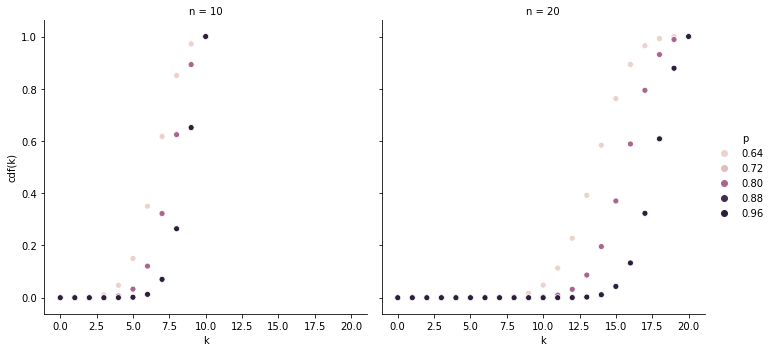

In [99]:
cdfs = [(p,n, k, stats.binom(n,p).cdf(k)) for p,n,k in it.product(ps,ns,ks)]
df = pd.DataFrame(cdfs, columns = ['p', 'n', 'k', 'cdf(k)'])
df.loc[(df.n == 10) & (df.k > 10), 'cdf(k)'] = np.nan
df = df.dropna()
sns.relplot(data=df, x='k', y='cdf(k)', col = 'n', hue = 'p')
plt.show()

In [102]:
ps = [.7, .8, .9]
ns = [10, 20]

for p in ps:
    for n in ns:
        p_at_least_half = stats.binom(n, p).sf((n/2)-1)
        p_one_leaves = stats.binom(n, p).pmf(n-1)
        p_all_stay = stats.binom(n, p).pmf(n)
        print(f'''---
        n = {n}, p = {p}
        P(at least half stay) = {p_at_least_half:4f}
        P(one subject leaves) = {p_one_leaves:4f}
        P(all the subjects stay) = {p_all_stay:4f}
        ''')
       

---
        n = 10, p = 0.7
        P(at least half stay) = 0.952651
        P(one subject leaves) = 0.121061
        P(all the subjects stay) = 0.028248
        
---
        n = 20, p = 0.7
        P(at least half stay) = 0.982855
        P(one subject leaves) = 0.006839
        P(all the subjects stay) = 0.000798
        
---
        n = 10, p = 0.8
        P(at least half stay) = 0.993631
        P(one subject leaves) = 0.268435
        P(all the subjects stay) = 0.107374
        
---
        n = 20, p = 0.8
        P(at least half stay) = 0.999437
        P(one subject leaves) = 0.057646
        P(all the subjects stay) = 0.011529
        
---
        n = 10, p = 0.9
        P(at least half stay) = 0.999853
        P(one subject leaves) = 0.387420
        P(all the subjects stay) = 0.348678
        
---
        n = 20, p = 0.9
        P(at least half stay) = 0.999999
        P(one subject leaves) = 0.270170
        P(all the subjects stay) = 0.121577
        
